In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 

In [2]:
df=pd.read_csv('quora_questions.csv')

In [3]:
df.head()

,Question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


In [4]:
len(df)

404289

In [15]:
df.isnull().sum()

Question    0
dtype: int64

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [110]:
tfidf = TfidfVectorizer(max_df=0.96, min_df=2 , stop_words='english')

In [111]:
x=tfidf.fit_transform(df['Question'])

In [112]:
x

<404289x38669 sparse matrix of type '<class 'numpy.float64'>'
	with 2002912 stored elements in Compressed Sparse Row format>

In [113]:
from sklearn.decomposition import NMF

In [133]:
nmf_model = NMF(n_components=8,random_state=21)

In [134]:
nmf_model.fit(x)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=8, random_state=21, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [135]:
nmf_model.components_.shape

(8, 38669)

In [136]:
tfidf.get_feature_names()[5000]

'blank'

In [137]:
nmf_model.components_[0].argsort()[-10:]

array([34869, 22924, 37520, 37630,   482,  5283,  5268, 22925, 37515,
        4632], dtype=int64)

In [138]:
d={}
for index,topic in enumerate(nmf_model.components_):
    d[index]=[tfidf.get_feature_names()[i] for i in topic.argsort()[-20:]]

In [139]:
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-20:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['friend', 'read', 'website', 'place', 'visit', 'places', 'phone', 'buy', 'lose', 'laptop', 'time', 'movie', 'ways', 'weight', '2016', 'books', 'book', 'movies', 'way', 'best']


THE TOP 15 WORDS FOR TOPIC #1
['guy', 'use', 'know', 'person', 'exist', 'new', 'compare', 'look', 'cost', 'really', 'girl', 'love', 'long', 'sex', 'time', 'work', 'feel', 'like', 'mean', 'does']


THE TOP 15 WORDS FOR TOPIC #2
['search', 'add', 'needing', 'post', 'don', 'know', 'answered', 'use', 'improvement', 'delete', 'easily', 'asked', 'google', 'answer', 'answers', 'ask', 'question', 'questions', 'people', 'quora']


THE TOP 15 WORDS FOR TOPIC #3
['website', 'using', 'friends', 'facebook', 'notes', '500', '1000', 'free', 'internet', 'easiest', 'home', 'easy', 'black', 'youtube', 'ways', 'way', 'earn', 'online', 'make', 'money']


THE TOP 15 WORDS FOR TOPIC #4
['going', 'new', 'people', 'change', 'good', 'moment', 'live', 'employees', 'want', 'like', 'real', 'love', 'things', 

In [156]:
wc = WordCloud(background_color="white",max_words=20, 
            max_font_size= 40)
wc.generate(" ".join(d[7]))

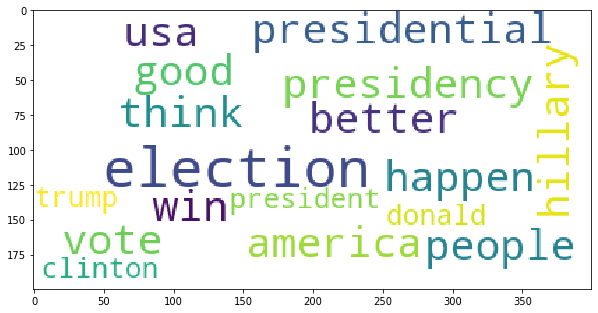

In [157]:
plt.figure(figsize=(10,10))
plt.imshow(wc)

In [142]:
result=nmf_model.transform(x)

In [143]:
result.shape

(404289, 8)

In [144]:
result

array([[4.04897600e-04, 0.00000000e+00, 0.00000000e+00, ...,
        3.05104932e-02, 2.78912851e-04, 0.00000000e+00],
       [2.21727908e-04, 1.32119989e-04, 2.88381489e-06, ...,
        6.12046508e-05, 2.98555801e-05, 1.12968743e-05],
       [6.99124024e-04, 9.59043135e-04, 2.16288363e-03, ...,
        3.09112021e-04, 8.59785672e-04, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.91897447e-05, 1.81872737e-06, ...,
        6.57924646e-05, 1.10166463e-06, 0.00000000e+00],
       [5.09091665e-04, 1.67711817e-03, 0.00000000e+00, ...,
        4.74670536e-03, 3.26504205e-04, 3.07267087e-04],
       [5.53653160e-04, 1.50296904e-02, 4.02281688e-04, ...,
        1.88461038e-04, 0.00000000e+00, 6.48936006e-05]])

In [145]:
df['pred_label']=result.argmax(axis=1)

In [146]:
df.head()

,Question,pred_label
0,What is the step by step guide to invest in sh...,5
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,4
2,How can I increase the speed of my internet co...,3
3,Why am I mentally very lonely? How can I solve...,5
4,"Which one dissolve in water quikly sugar, salt...",1


In [147]:
df.iloc[0]['Question']

'What is the step by step guide to invest in share market in india?'

In [151]:
d[5]

['modi',
 'people',
 'currency',
 'economy',
 'new',
 'government',
 'world',
 'ban',
 'black',
 'banning',
 'think',
 'war',
 'indian',
 'rupee',
 'pakistan',
 'rs',
 '1000',
 'notes',
 '500',
 'india']

In [152]:
df.iloc[1]['Question']

'What is the story of Kohinoor (Koh-i-Noor) Diamond?'

In [153]:
d[4]

['going',
 'new',
 'people',
 'change',
 'good',
 'moment',
 'live',
 'employees',
 'want',
 'like',
 'real',
 'love',
 'things',
 'day',
 'important',
 'thing',
 'meaning',
 'know',
 'purpose',
 'life']